In [1]:
import numpy as np
import pandas as pd
import os
import itertools
import os, stat, time
from os.path import dirname as up
import shutil
from PIL import Image
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

base = './kaggle/input/breast-histopathology-images/'

ids = os.listdir(base)
data = []
for id in tqdm(ids):
  try:
    files1 = os.listdir(base + id + '/1/')
    files0 = os.listdir(base + id + '/0/')
    for x in files1:
      data.append(base + id + '/1/' + x)
    for x in files0:
      data.append(base + id + '/0/' + x)
  except:
    FileNotFoundError
len(data)

  0%|          | 0/279 [00:00<?, ?it/s]

277524

In [3]:
import random

random.shuffle(data)
data = data[:20000]
len(data)

20000

In [4]:
import cv2
from tqdm.notebook import tqdm
import keras_preprocessing.image as IMAGE
from PIL import Image

images=[]
labels=[]

for i in tqdm(data):
  label = int(i[-5])
  img = IMAGE.img_to_array(IMAGE.load_img(i, target_size=(50, 50)))
  images.append(img)
  labels.append(label)

  0%|          | 0/20000 [00:00<?, ?it/s]

In [ ]:
from sklearn.model_selection import train_test_split

y = np.array(labels)
x = np.stack(images)/255

x_train,x_test,y_train,y_test = train_test_split(x, y, random_state=0, test_size=0.3)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

In [6]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(50,50,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer ='adam', metrics= ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 47, 47, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 32)          16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 32)          0


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [7]:
import tensorflow as tf

history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, verbose = 2, batch_size = 256)

2021-11-07 16:27:19.167893: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
55/55 - 7s - loss: 0.5774 - accuracy: 0.7091 - val_loss: 0.5586 - val_accuracy: 0.7055
Epoch 2/100
55/55 - 6s - loss: 0.4844 - accuracy: 0.7674 - val_loss: 0.5720 - val_accuracy: 0.7208
Epoch 3/100
55/55 - 7s - loss: 0.4298 - accuracy: 0.8110 - val_loss: 0.4926 - val_accuracy: 0.7832
Epoch 4/100
55/55 - 6s - loss: 0.4184 - accuracy: 0.8183 - val_loss: 0.4391 - val_accuracy: 0.8220
Epoch 5/100
55/55 - 6s - loss: 0.4133 - accuracy: 0.8241 - val_loss: 0.4316 - val_accuracy: 0.8202
Epoch 6/100
55/55 - 6s - loss: 0.4086 - accuracy: 0.8244 - val_loss: 0.5652 - val_accuracy: 0.7215
Epoch 7/100
55/55 - 6s - loss: 0.4162 - accuracy: 0.8189 - val_loss: 0.4390 - val_accuracy: 0.8133
Epoch 8/100
55/55 - 7s - loss: 0.4022 - accuracy: 0.8257 - val_loss: 0.4718 - val_accuracy: 0.7938
Epoch 9/100
55/55 - 6s - loss: 0.4071 - accuracy: 0.8212 - val_loss: 0.4832 - val_accuracy: 0.7975
Epoch 10/100
55/55 - 6s - loss: 0.4030 - accuracy: 0.8250 - val_loss: 0.4040 - val_accuracy: 0.8255
Epoch 11/

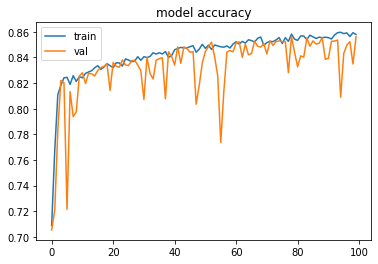

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

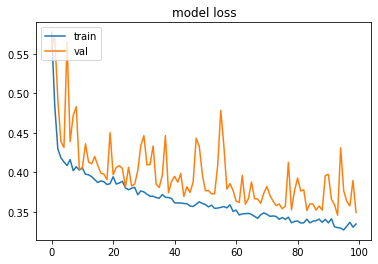

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()